In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cars = pd.read_csv("D:\\Praxis\\ML\\data\\imports_85.csv")
cars.head()

,CarId,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,2,164.0,audi,gas,std,4.0,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,2,164.0,audi,gas,std,4.0,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
# Shape of data

cars.shape

(205, 27)

In [4]:
# dtypes of columns

cars.dtypes

CarId                  int64
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
h8                   float64
curb-w8                int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression          float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [5]:
# Column names in data

cars.columns

Index(['CarId', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'h8', 'curb-w8',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# missing values in the data

#missing data
total = cars.isnull().sum().sort_values(ascending=False)
percent = (cars.isnull().sum()/cars.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                   Total   Percent
normalized-losses     41  0.200000
price                  4  0.019512
stroke                 4  0.019512
bore                   4  0.019512
peak-rpm               2  0.009756
horsepower             2  0.009756
num-of-doors           2  0.009756
wheel-base             0  0.000000
symboling              0  0.000000
make                   0  0.000000
fuel-type              0  0.000000
aspiration             0  0.000000
body-style             0  0.000000
drive-wheels           0  0.000000
engine-location        0  0.000000
h8                     0  0.000000
length                 0  0.000000
width                  0  0.000000
highway-mpg            0  0.000000
curb-w8                0  0.000000
engine-type            0  0.000000
num-of-cylinders       0  0.000000
engine-size            0  0.000000
fuel-system            0  0.000000
compression            0  0.000000
city-mpg               0  0.000000
CarId                  0  0.000000


In [7]:
# Normalised losses, price, bore, peak-rpm, horesepower have missing values.
# lets look at the distribution of the variables

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0, 'Losses')

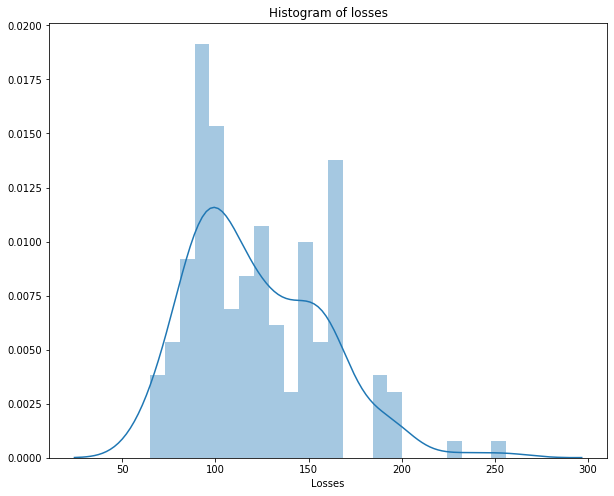

In [8]:
# normalised losses

plt.figure(figsize=(10,8))
sns.distplot(cars['normalized-losses'], bins=24)
plt.title("Histogram of losses")
plt.xlabel("Losses")

### PRICE

Text(0.5, 0, 'Price')

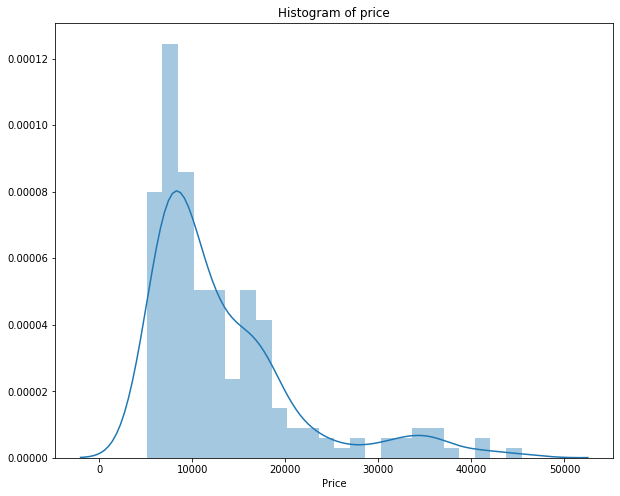

In [9]:
# price

plt.figure(figsize=(10,8))
sns.distplot(cars['price'], bins=24)
plt.title("Histogram of price")
plt.xlabel("Price")

In [10]:
cars[cars.price.isnull()]

,CarId,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,10,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,45,1,NaN,isuzu,gas,std,2.0,sedan,fwd,front,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,46,0,NaN,isuzu,gas,std,4.0,sedan,fwd,front,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,130,1,NaN,porsche,gas,std,2.0,hatchback,rwd,front,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [11]:
np.mean(cars[cars.make == 'audi'].price)

17859.166666666668

In [12]:
np.mean(cars[cars.make == 'isuzu'].price)

8916.5

In [13]:
np.mean(cars[cars.make == 'porsche'].price)

31400.5

In [14]:
cars.loc[(cars.price.isnull()) & (cars.make =='audi'),'price'] = np.mean(cars[cars.make == 'audi'].price)

In [15]:
cars.loc[(cars.price.isnull()) & (cars.make =='isuzu'),'price'] = np.mean(cars[cars.make == 'isuzu'].price)

In [16]:
cars.loc[(cars.price.isnull()) & (cars.make =='porsche'),'price'] = np.mean(cars[cars.make == 'porsche'].price)

### Stroke

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0, 'stroke')

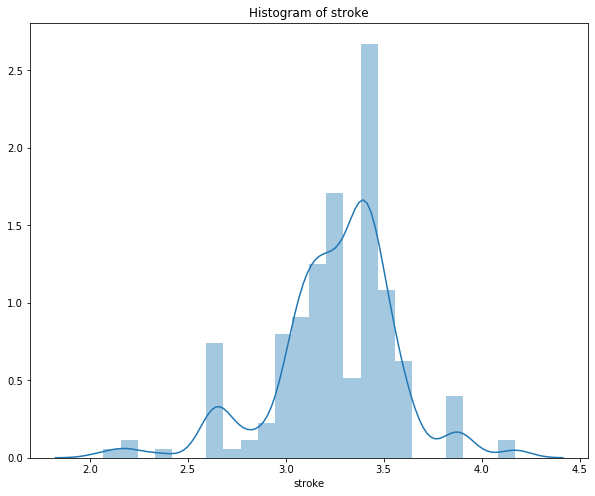

In [17]:
# histogram of stroke

plt.figure(figsize=(10,8))
sns.distplot(cars['stroke'], bins=24)
plt.title("Histogram of stroke")
plt.xlabel("stroke")

In [18]:
np.mean(cars.stroke)

3.2554228855721337

In [19]:
cars.loc[cars.stroke.isnull(),'stroke'] = np.mean(cars.stroke)

### BORE

Text(0.5, 0, 'bore')

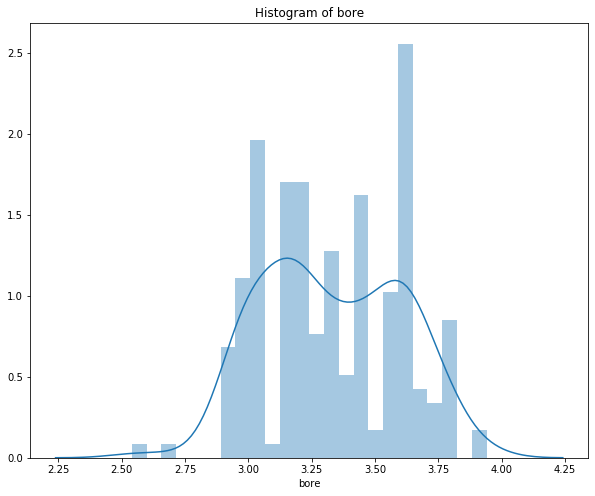

In [20]:
# histogram of stroke

plt.figure(figsize=(10,8))
sns.distplot(cars['bore'], bins=24)
plt.title("Histogram of bore")
plt.xlabel("bore")

In [21]:
cars.loc[cars.bore.isnull(),'bore'] = np.mean(cars.bore)

### peak-rpm

Text(0.5, 0, 'peak-rpm')

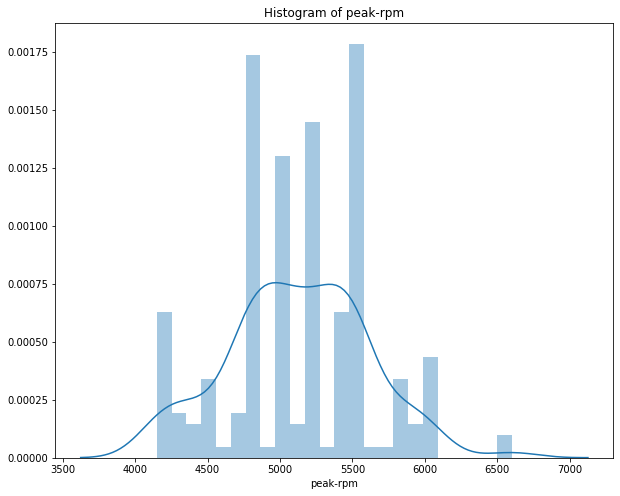

In [22]:
# histogram of peak-rpm

plt.figure(figsize=(10,8))
sns.distplot(cars['peak-rpm'], bins=24)
plt.title("Histogram of peak-rpm")
plt.xlabel("peak-rpm")

In [23]:
cars.loc[cars['peak-rpm'].isnull(),'peak-rpm'] = np.mean(cars['peak-rpm'])

### HORSEPOWER

Text(0.5, 0, 'horsepower')

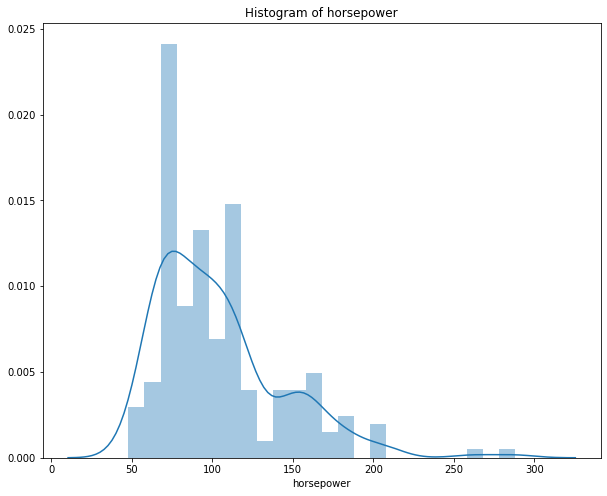

In [24]:
# histogram of horsepower

plt.figure(figsize=(10,8))
sns.distplot(cars['horsepower'], bins=24)
plt.title("Histogram of horsepower")
plt.xlabel("horsepower")

In [25]:
cars.loc[cars['horsepower'].isnull(),'horsepower'] = 69

In [26]:
# missing values in the data

#missing data
total = cars.isnull().sum().sort_values(ascending=False)
percent = (cars.isnull().sum()/cars.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                   Total   Percent
normalized-losses     41  0.200000
num-of-doors           2  0.009756
price                  0  0.000000
width                  0  0.000000
symboling              0  0.000000
make                   0  0.000000
fuel-type              0  0.000000
aspiration             0  0.000000
body-style             0  0.000000
drive-wheels           0  0.000000
engine-location        0  0.000000
wheel-base             0  0.000000
length                 0  0.000000
h8                     0  0.000000
highway-mpg            0  0.000000
curb-w8                0  0.000000
engine-type            0  0.000000
num-of-cylinders       0  0.000000
engine-size            0  0.000000
fuel-system            0  0.000000
bore                   0  0.000000
stroke                 0  0.000000
compression            0  0.000000
horsepower             0  0.000000
peak-rpm               0  0.000000
city-mpg               0  0.000000
CarId                  0  0.000000


In [27]:
# we have to drop normalized-losses since it is a pre provided value. 20% of the obs are missing, so using a mean or median imputation wont be a good choice

In [28]:
# UNIVARIATE ANALYSIS

### Symboling

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

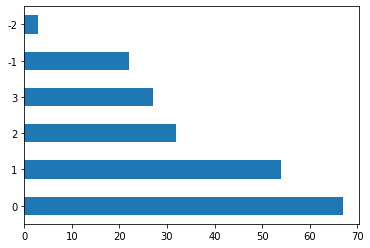

In [29]:
cars.symboling.value_counts().plot(kind= 'barh',figsize=(6,4))

### Make

Which company made the car

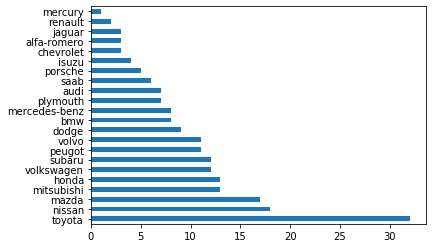

In [30]:
cars.make.value_counts().plot(kind= 'barh',figsize=(6,4))

In [31]:
# in our given dataset, toyota has made the most cars followed nissan

In [32]:
### FUEL TYPE

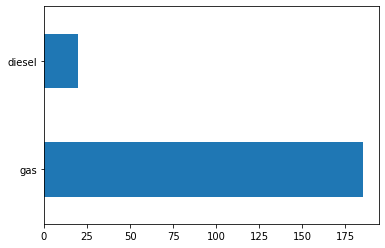

In [33]:
cars['fuel-type'].value_counts().plot(kind= 'barh',figsize=(6,4))

In [34]:
cars['fuel-type'].value_counts()/cars.shape[0]

gas       0.902439
diesel    0.097561
Name: fuel-type, dtype: float64

In [35]:
# 90% of the given cars are gas engines.
# 9% of the diesel are diesel engines

### aspiration

A naturally-aspirated engine is one that is not fitted with a turbocharger or supercharger. In other words, air goes into the engine normally, whereas turbocharged and supercharged engines force the air in under pressure to boost power.

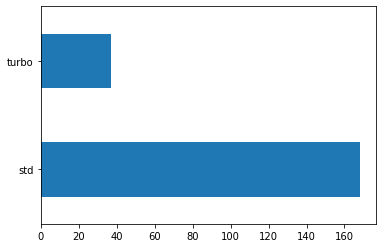

In [36]:
cars['aspiration'].value_counts().plot(kind= 'barh',figsize=(6,4))

In [37]:
cars['aspiration'].value_counts()/cars.shape[0]

std      0.819512
turbo    0.180488
Name: aspiration, dtype: float64

In [38]:
# 81% of the cars in our given dataset have standard aspiration.
# 19% of them have turbo aspiration.

### body-style

In [39]:
cars['body-style'].value_counts()/cars.shape[0]

sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: body-style, dtype: float64

### drive-wheels

- This setup transfers power to the front wheels, giving them the responsibility of moving and steering the vehicle. They are typically cheaper to manufacturer and are more space-saving than rear-wheel drive.

- In rear-wheel drivetrains, power is transferred to the two back wheels. There are many benefits to having power transferred to the rear wheels, 
including superior handling, acceleration, and braking.

- While there are important differences between the two, both 4WD and AWD are drivetrain types that transfer power from the engine to all four wheels of your vehicle.

In [40]:
cars['drive-wheels'].value_counts()/cars.shape[0]

fwd    0.585366
rwd    0.370732
4wd    0.043902
Name: drive-wheels, dtype: float64

### engine-location

- front - most vehicles. almost all the fwd drives.

- read - sports car

In [41]:
cars['engine-location'].value_counts()/cars.shape[0]

front    0.985366
rear     0.014634
Name: engine-location, dtype: float64

### Usual specs

- height
- weight
- wheel-base
- curb-weight

In [42]:
### engine-type

cars['engine-type'].value_counts()/cars.shape[0]

ohc      0.721951
ohcf     0.073171
ohcv     0.063415
l        0.058537
dohc     0.058537
rotor    0.019512
dohcv    0.004878
Name: engine-type, dtype: float64

In [43]:
### num-of-cylinders

cars['num-of-cylinders'].value_counts()/cars.shape[0]

4     0.775610
6     0.117073
5     0.053659
8     0.024390
2     0.019512
12    0.004878
3     0.004878
Name: num-of-cylinders, dtype: float64

Text(0.5, 0, 'engine-size')

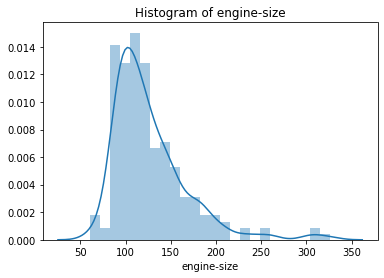

In [44]:
# histogram of engine-size

plt.figure(figsize=(6,4))
sns.distplot(cars['engine-size'], bins=24)
plt.title("Histogram of engine-size")
plt.xlabel("engine-size")

The short answer is that a bigger bore is generally the best way to get more power. It creates more space, allowing for bigger valve openings, which in turn can bring more fuel and air into the cylinder. This doesn't work well at low rpm but does at high rpm. That plays well in to the other factor. A bigger bore with a shorter stroke also allows an engine to rev higher, which creates more horsepower.

Conversely, a long stroke is generally better for fuel efficiency, because it reduces surface area during combustion. With less surface area, there is less room for heat to escape, ensuring more of the energy from combustion is turned into useful work to push down the piston.

### HORSEPOWER

Horsepower (hp) is the metric used to indicate the power produced by a car's engine - the higher the number

Text(0.5, 0, 'horsepower')

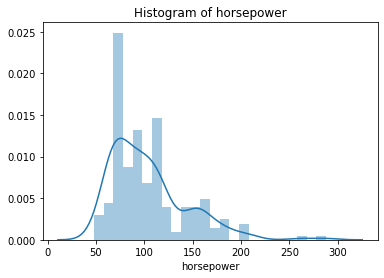

In [45]:
# histogram of horsepower

plt.figure(figsize=(6,4))
sns.distplot(cars['horsepower'], bins=24)
plt.title("Histogram of horsepower")
plt.xlabel("horsepower")

### city-mpg 

MPG is an abbreviation for 'miles-per-gallon' and it is used to give you an indication of the fuel economy of a car or commercial vehicle. It helps you to work out how cheap or expensive a car will be to run.

Text(0.5, 0, 'city-mpg')

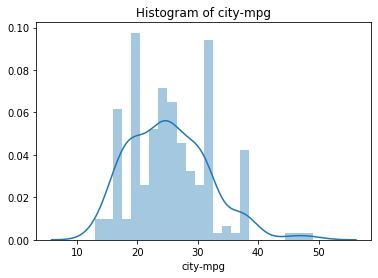

In [46]:
# histogram of city-mpg

plt.figure(figsize=(6,4))
sns.distplot(cars['city-mpg'], bins=24)
plt.title("Histogram of city-mpg")
plt.xlabel("city-mpg")

### PRICE

Text(0.5, 0, 'price')

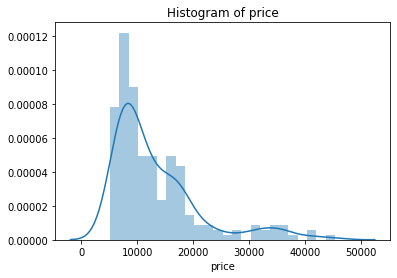

In [47]:
# histogram of price

plt.figure(figsize=(6,4))
sns.distplot(cars['price'], bins=24)
plt.title("Histogram of price")
plt.xlabel("price")

Text(0.5, 0, 'log_price')

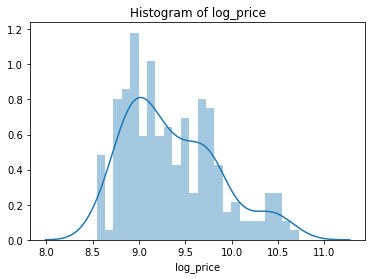

In [48]:
### it is skewed to the right, let's do a log transformation and check

# histogram of log_price

cars['log_price'] = np.log(cars['price'])

plt.figure(figsize=(6,4))
sns.distplot(cars['log_price'], bins=24)
plt.title("Histogram of log_price")
plt.xlabel("log_price")

In [49]:
### this is more normally distributed

In [50]:
# BIVARIATE ANALYSIS

In [51]:
cars.columns

Index(['CarId', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'h8', 'curb-w8',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'log_price'],
      dtype='object')

In [52]:
x = ['symboling', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'h8', 'curb-w8',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'log_price']

cars1 = cars[x]

# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(cars1.corr(), annot=True,cmap='RdYlGn',center=0) 

In [53]:
cars1.corr(method ='pearson')

,symboling,num-of-doors,wheel-base,length,width,h8,curb-w8,num-of-cylinders,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price,log_price
symboling,1.000000,-0.664550,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130083,-0.008689,0.069954,0.273679,-0.035823,0.034606,-0.079978,-0.088717
num-of-doors,-0.664550,1.000000,0.445696,0.393593,0.202072,0.547651,0.195683,-0.016530,0.017519,0.113117,-0.010654,-0.122748,-0.241249,-0.020812,-0.044507,0.030093,0.084407
wheel-base,-0.531954,0.445696,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488760,0.160944,0.354449,-0.360704,-0.470414,-0.544082,0.577816,0.629401
length,-0.357612,0.393593,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606462,0.129522,0.548702,-0.287031,-0.670909,-0.704662,0.682920,0.767864
width,-0.232919,0.202072,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559152,0.182939,0.637120,-0.219859,-0.642704,-0.677218,0.759325,0.802544
h8,-0.541038,0.547651,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171101,-0.055351,-0.106594,-0.320602,-0.048640,-0.107358,0.119336,0.162798
curb-w8,-0.227691,0.195683,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648485,0.168783,0.748687,-0.266283,-0.757414,-0.797465,0.835305,0.891237
num-of-cylinders,-0.113129,-0.016530,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231439,0.008151,0.691620,-0.124358,-0.445837,-0.466666,0.718305,0.631713
engine-size,-0.105790,0.017519,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583798,0.203094,0.806533,-0.244599,-0.653658,-0.677470,0.874145,0.831985
bore,-0.130083,0.113117,0.488760,0.606462,0.559152,0.171101,0.648485,0.231439,0.583798,1.000000,-0.055909,0.569336,-0.254761,-0.584508,-0.586992,0.553174,0.610562


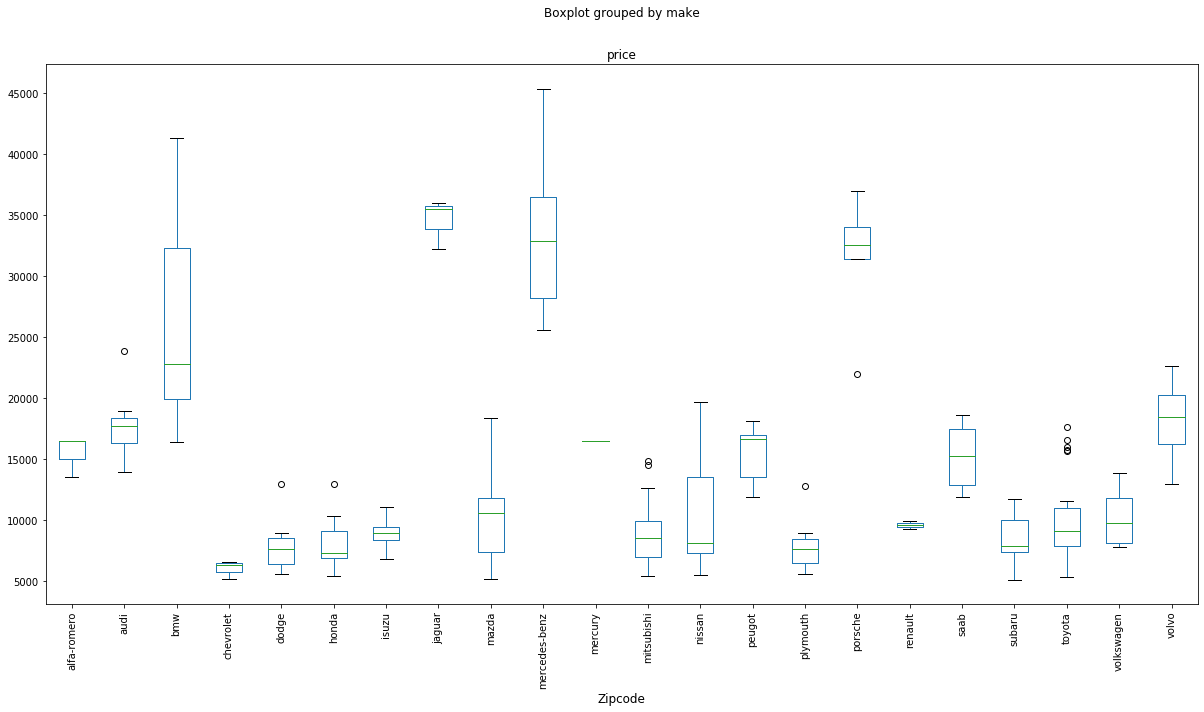

In [54]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="price", 
             by="make",
             grid=False,         
             figsize = (20,10),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("Zipcode", fontsize=12)
#plt.title("Boxplot of MPG", fontsize=14)

plt.show()


Prices of BMW and Mercedes are very far from the prices of other cars. the lowest priced mercedes is higher than the highest price of most cars

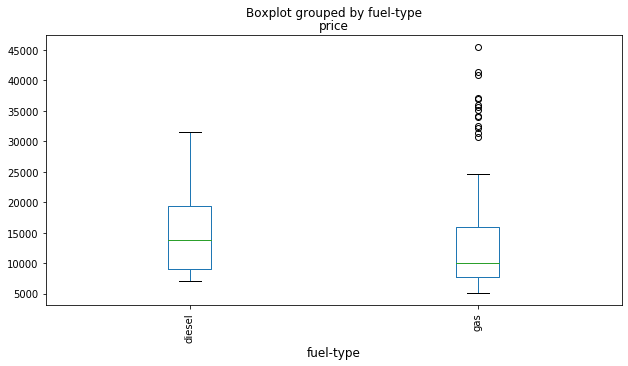

In [55]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="price", 
             by="fuel-type",
             grid=False,         
             figsize = (10,5),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("fuel-type", fontsize=12)
#plt.title("Boxplot of MPG", fontsize=14)

plt.show()


This is a bit of a surprise. Not much difference in the prices for petrol and diesel engine

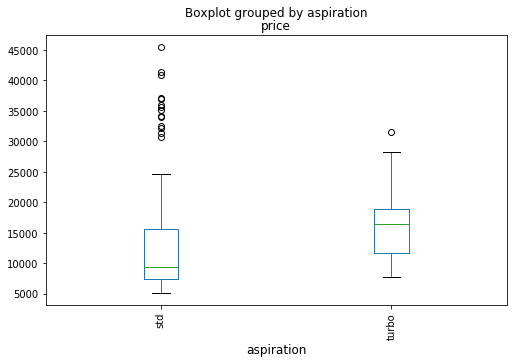

In [56]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="price", 
             by="aspiration",
             grid=False,         
             figsize = (8,5),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("aspiration", fontsize=12)
#plt.title("Boxplot of MPG", fontsize=14)

plt.show()


In [57]:
# turbos are priced higher generally. But std has a few outliers. This could be due to other factors.

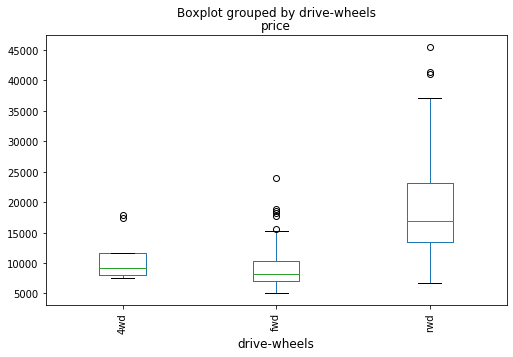

In [58]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="price", 
             by="drive-wheels",
             grid=False,         
             figsize = (8,5),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("drive-wheels", fontsize=12)
#plt.title("Boxplot of MPG", fontsize=14)

plt.show()


This was expected. rwd vehicles are sports vehicles. So they are priced a bit higher

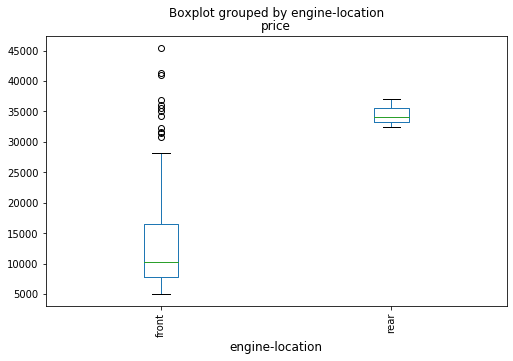

In [59]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="price", 
             by="engine-location",
             grid=False,         
             figsize = (8,5),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("engine-location", fontsize=12)
#plt.title("Boxplot of MPG", fontsize=14)

plt.show()


Only in sports cars, engines are on the rear side. So price is high.

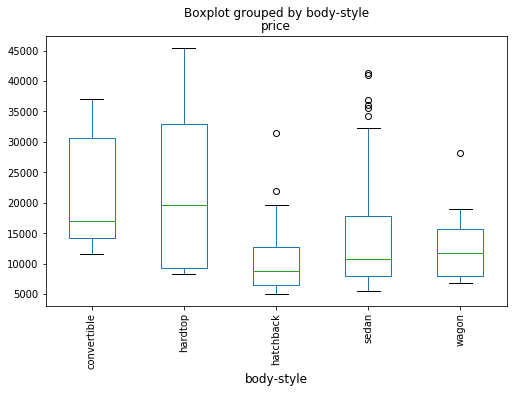

In [60]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column="price", 
             by="body-style",
             grid=False,         
             figsize = (8,5),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("body-style", fontsize=12)
#plt.title("Boxplot of MPG", fontsize=14)

plt.show()


In [61]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
zip_dummies = lb.fit_transform(cars['make'])
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)
cars2 = cars.join(zip_dum_df)

In [62]:
cars2.columns

Index(['CarId', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'h8', 'curb-w8',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'log_price', 'alfa-romero', 'audi', 'bmw',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [63]:
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(cars2['drive-wheels'])

In [64]:
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)
cars2 = cars2.join(zip_dum_df)

In [65]:
cars2.loc[cars2['engine-location'] == 'front','engine-location'] = 1
cars2.loc[cars2['engine-location'] == 'rear','engine-location'] = 0

In [66]:
cars2['engine-location'].value_counts()

1    202
0      3
Name: engine-location, dtype: int64

In [82]:
#cars2['fuel-type'].value_counts()

1    185
0     20
Name: fuel-type, dtype: int64

In [67]:
cars2.loc[cars2['aspiration'] == 'std','aspiration'] = 0
cars2.loc[cars2['aspiration'] == 'turbo','aspiration'] = 1

In [68]:
cars2.loc[cars2['fuel-type'] == 'diesel','fuel-type'] = 0
cars2.loc[cars2['fuel-type'] == 'gas','fuel-type'] = 1

In [69]:
cars2.shape

(205, 53)

### MODEL BUILDING

In [95]:
# Train test split
X=cars2.drop(columns=['price','log_price','make','drive-wheels','engine-type','fuel-system','normalized-losses','body-style','num-of-doors'])
y=cars2[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

### MODEL 1

We saw how much price difference there was between one manufacturer and the other. Thus make seems to be a good place to start our model.

In [96]:
cars.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [97]:
makes = ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']

In [98]:
X_train1 = X_train[makes]
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train, X_train1).fit()
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     24.25
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           7.32e-37
Time:                        20:31:01   Log-Likelihood:                -2.1799
No. Observations:                 164   AIC:                             48.36
Df Residuals:                     142   BIC:                             116.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.0379      0.027    335.525

Model with only make as the predictor has 78.2% of R2 and 75% adj R2

In [74]:
# Lets add MPG to the predictor list.

In [99]:
predictors = makes

In [100]:
makes.append('horsepower')
predictors = makes

In [101]:
X_train2 = X_train[predictors]
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create a first ols model
model_2 = sm.OLS(y_train, X_train2).fit()
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     66.48
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           2.60e-63
Time:                        20:31:06   Log-Likelihood:                 72.293
No. Observations:                 164   AIC:                            -98.59
Df Residuals:                     141   BIC:                            -27.29
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.2575      0.057    145.676

In [110]:
# lets add engine-location to it

In [113]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train.astype('float64')

,CarId,symboling,fuel-type,aspiration,engine-location,wheel-base,length,width,h8,curb-w8,...,porsche,renault,saab,subaru,toyota,volkswagen,volvo,4wd,fwd,rwd
97,98.0,1.0,1.0,0.0,1.0,94.5,170.2,63.8,53.5,2037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
198,199.0,-2.0,1.0,1.0,1.0,104.3,188.8,67.2,56.2,3045.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
51,52.0,1.0,1.0,0.0,1.0,93.1,159.1,64.2,54.1,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63,64.0,0.0,0.0,0.0,1.0,98.8,177.8,66.5,55.5,2443.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,75.0,1.0,1.0,0.0,1.0,112.0,199.2,72.0,55.4,3715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153.0,1.0,1.0,0.0,1.0,95.7,158.7,63.6,54.5,2015.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
116,117.0,0.0,0.0,1.0,1.0,107.9,186.7,68.4,56.7,3252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53,54.0,1.0,1.0,0.0,1.0,93.1,166.8,64.2,54.1,1945.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38,39.0,0.0,1.0,0.0,1.0,96.5,167.5,65.2,53.3,2289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
predictors.append('engine-location')

In [116]:
X_train3 = X_train[predictors]
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create a first ols model
model_3 = sm.OLS(y_train, X_train3).fit()
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     65.50
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           2.11e-63
Time:                        23:07:49   Log-Likelihood:                 75.047
No. Observations:                 164   AIC:                            -102.1
Df Residuals:                     140   BIC:                            -27.70
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.5934      0.163     

### PREDICTIONS

In [117]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test.astype('float64')

,CarId,symboling,fuel-type,aspiration,engine-location,wheel-base,length,width,h8,curb-w8,...,porsche,renault,saab,subaru,toyota,volkswagen,volvo,4wd,fwd,rwd
5,6.0,2.0,1.0,0.0,1.0,99.8,177.3,66.3,53.1,2507.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
66,67.0,0.0,0.0,0.0,1.0,104.9,175.0,66.1,54.4,2700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7.0,1.0,1.0,0.0,1.0,105.8,192.7,71.4,55.7,2844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
174,175.0,-1.0,0.0,1.0,1.0,102.4,175.6,66.5,54.9,2480.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
54,55.0,1.0,1.0,0.0,1.0,93.1,166.8,64.2,54.1,1950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111,112.0,0.0,1.0,0.0,1.0,107.9,186.7,68.4,56.7,3075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145,146.0,0.0,1.0,1.0,1.0,97.0,172.0,65.4,54.3,2510.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
169,170.0,2.0,1.0,0.0,1.0,98.4,176.2,65.6,52.0,2551.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
117,118.0,0.0,1.0,1.0,1.0,108.0,186.7,68.3,56.0,3130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,0.0,1.0,1.0,1.0,99.5,178.2,67.9,52.0,3053.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
# Predicting the price of training set.
X_test_stepwise = X_test[predictors]
X_test_stepwise = sm.add_constant(X_test_stepwise)
actual     = y_test["log_price"]
prediction = model_3.predict(X_test_stepwise)

In [120]:
#Evaluvation: MSE
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

0.04127013420523421


In [121]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [122]:
mean_absolute_percentage_error(actual, prediction)

1.5219164435547616

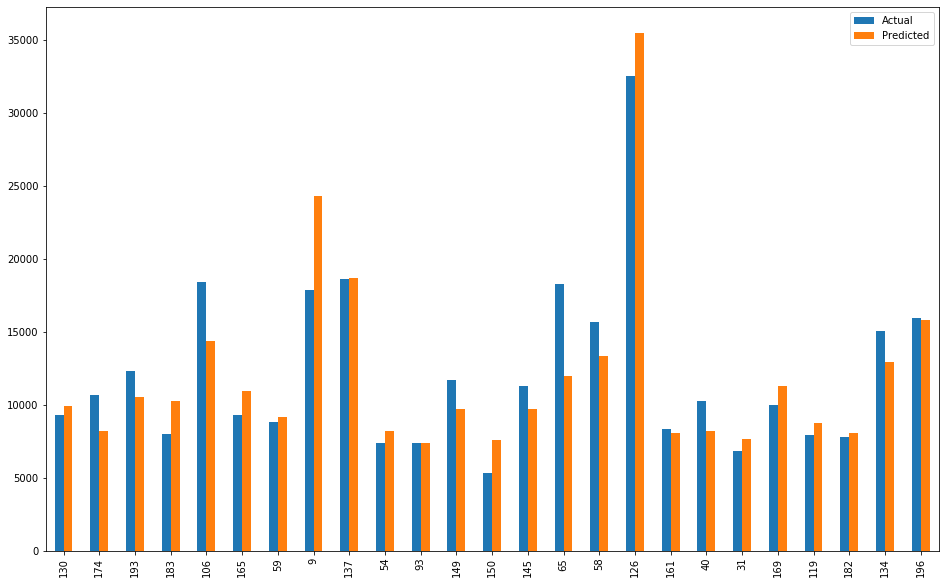

In [124]:
df = pd.DataFrame({'Actual': np.exp(actual), 'Predicted': np.exp(prediction)})
df1 = df.sample(25)
plt.rc('xtick', labelsize= 10)     
df1.plot(kind='bar',figsize=(16,10),grid=False)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(b=None)
plt.show()

### ASSUMPTIONS

Text(0, 0.5, 'Predicted value')

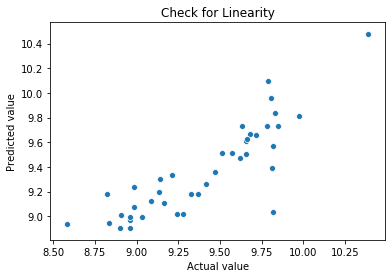

In [125]:
# Check for Linearity
sns.scatterplot(y_test['log_price'],prediction)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

Text(0.5, 0, 'Errors')

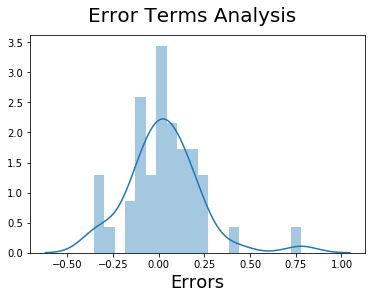

In [126]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test['log_price'] - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [ ]:
#The mean of residuals is zero

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)



 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  42.068690
p-value                         0.012678
f-value                         2.100119
f p-value                       0.004588

 Goldfeld-Quandt test ----
                value
F statistic  0.778486
p-value      0.831848

 Residuals plots ----


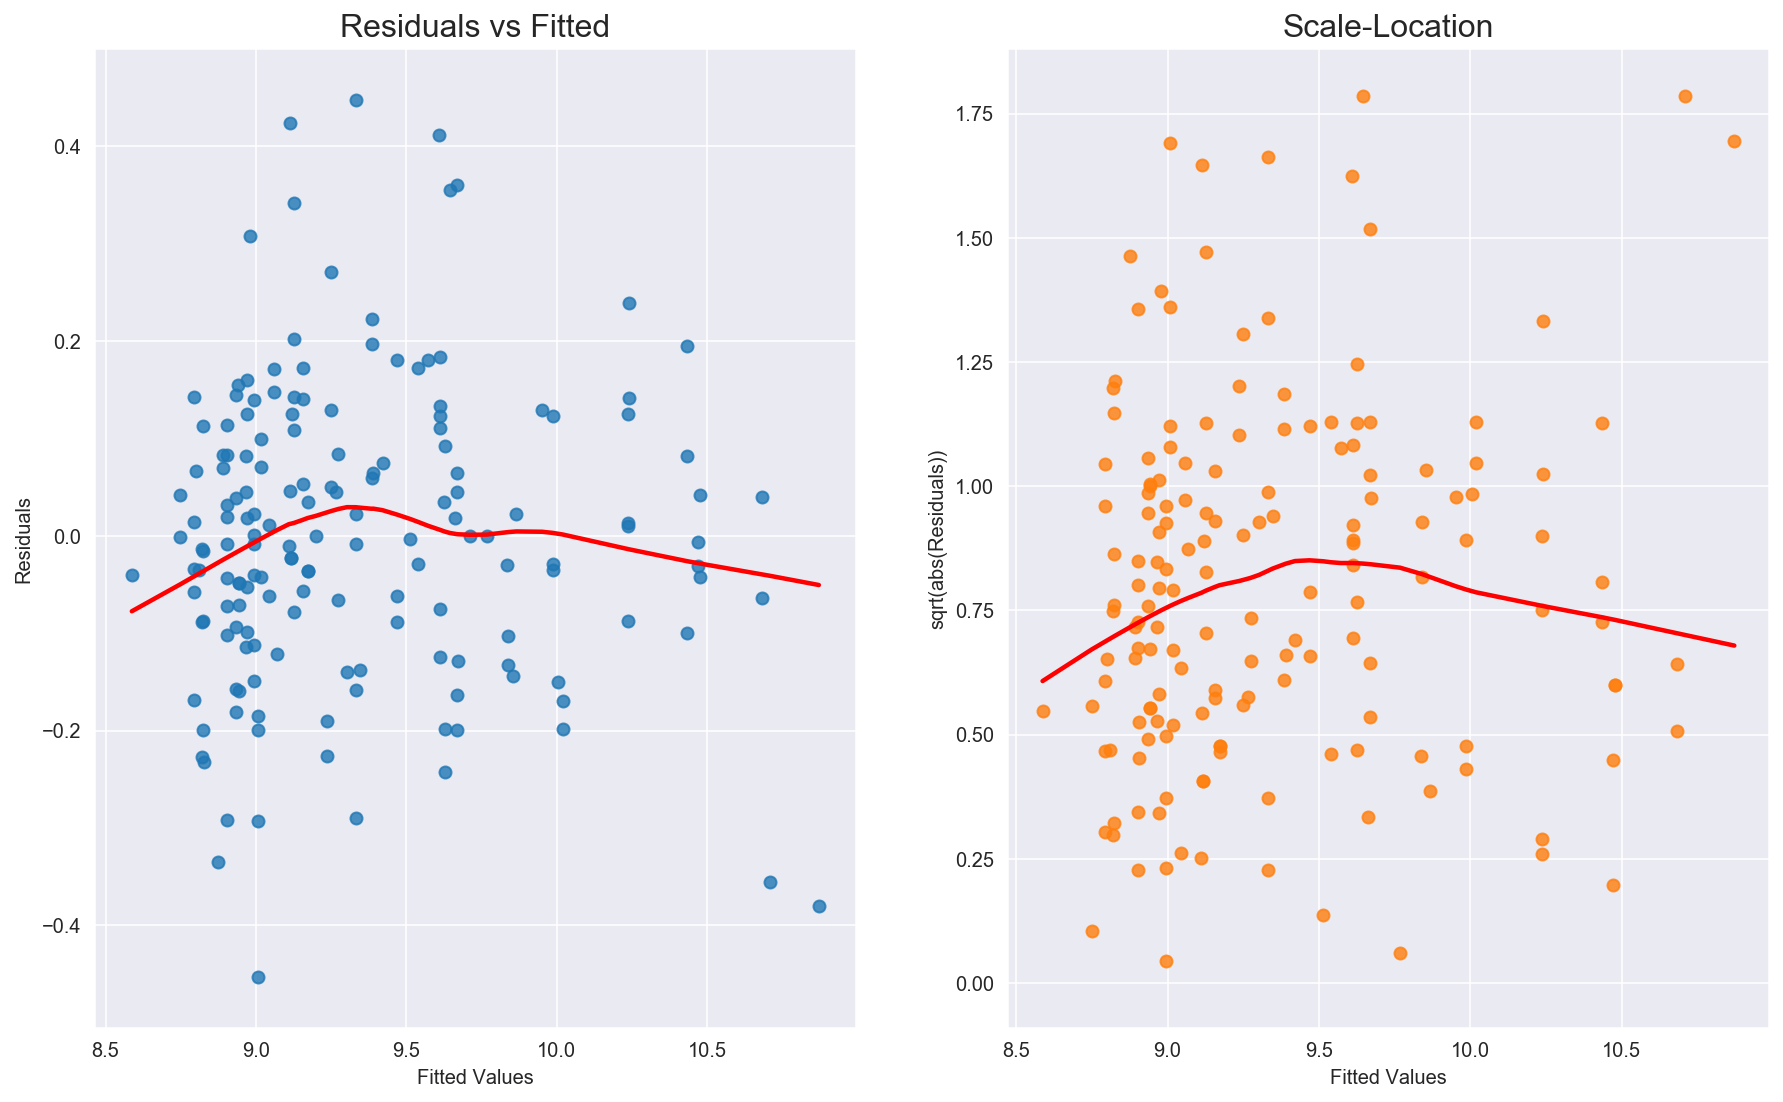

In [127]:
#Homoscedasticity of residuals or equal variance

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model_3)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


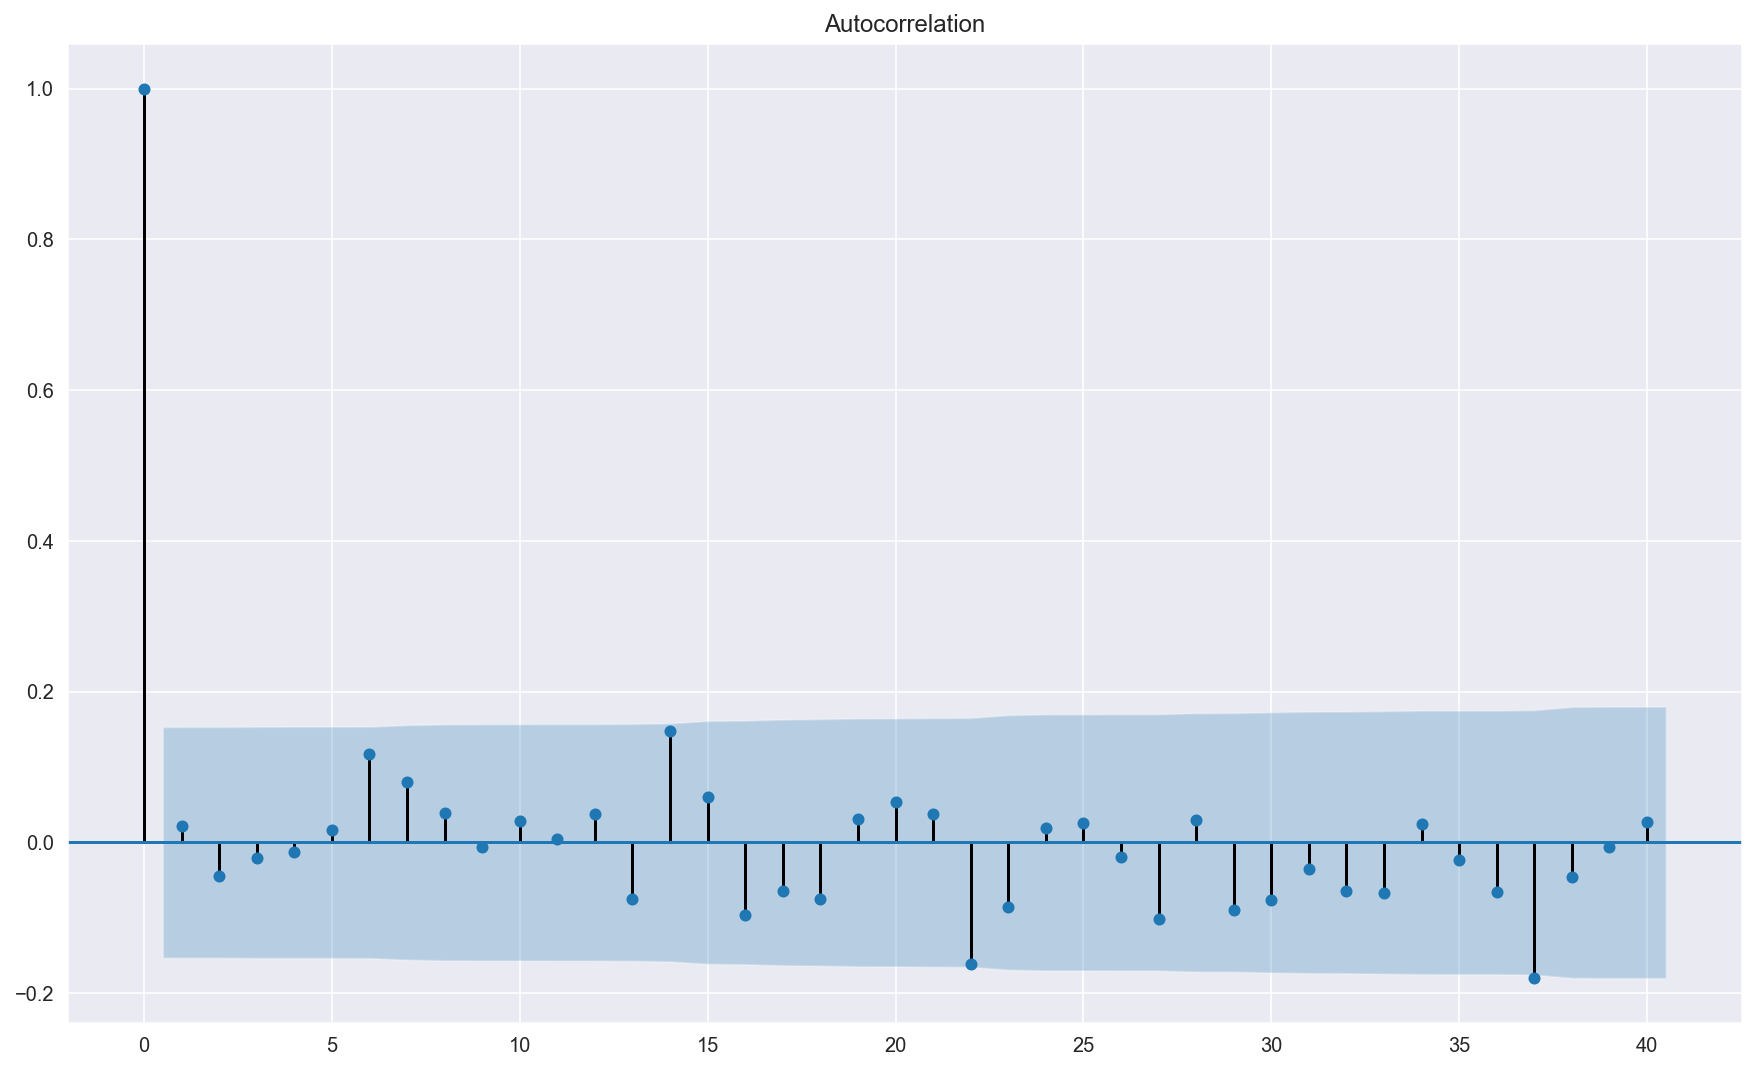

In [128]:
#No autocorrelation of residuals FAILED

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model_3.resid, lags=40 , alpha=0.05)
acf.show()

In [129]:
# The number of observations must be greater than the number of features
X_train.shape

(164, 44)

In [130]:
#There must be some variability in features

(X_train.apply(np.var, axis=0))

CarId                 3493.652104
symboling                1.556031
fuel-type                0.092913
aspiration               0.145561
engine-location          0.012046
wheel-base              39.086691
length                 163.984790
width                    4.743000
h8                       6.521649
curb-w8             299451.670546
num-of-cylinders         1.271713
engine-size           1947.735983
bore                     0.075180
stroke                   0.088201
compression             16.233850
horsepower            1636.600944
peak-rpm            227912.690497
city-mpg                44.918055
highway-mpg             49.936756
alfa-romero              0.017958
audi                     0.017958
bmw                      0.046401
chevrolet                0.017958
dodge                    0.046401
honda                    0.062574
isuzu                    0.017958
jaguar                   0.017958
mazda                    0.067817
mercedes-benz            0.046401
mercury       

Jarque-Bera test ---- statistic: 3.4409, p-value: 0.17898849136510142
Shapiro-Wilk test ---- statistic: 0.9886, p-value: 0.2064
Kolmogorov-Smirnov test ---- statistic: 0.3614, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.4834, 5% critical value: 0.7690
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


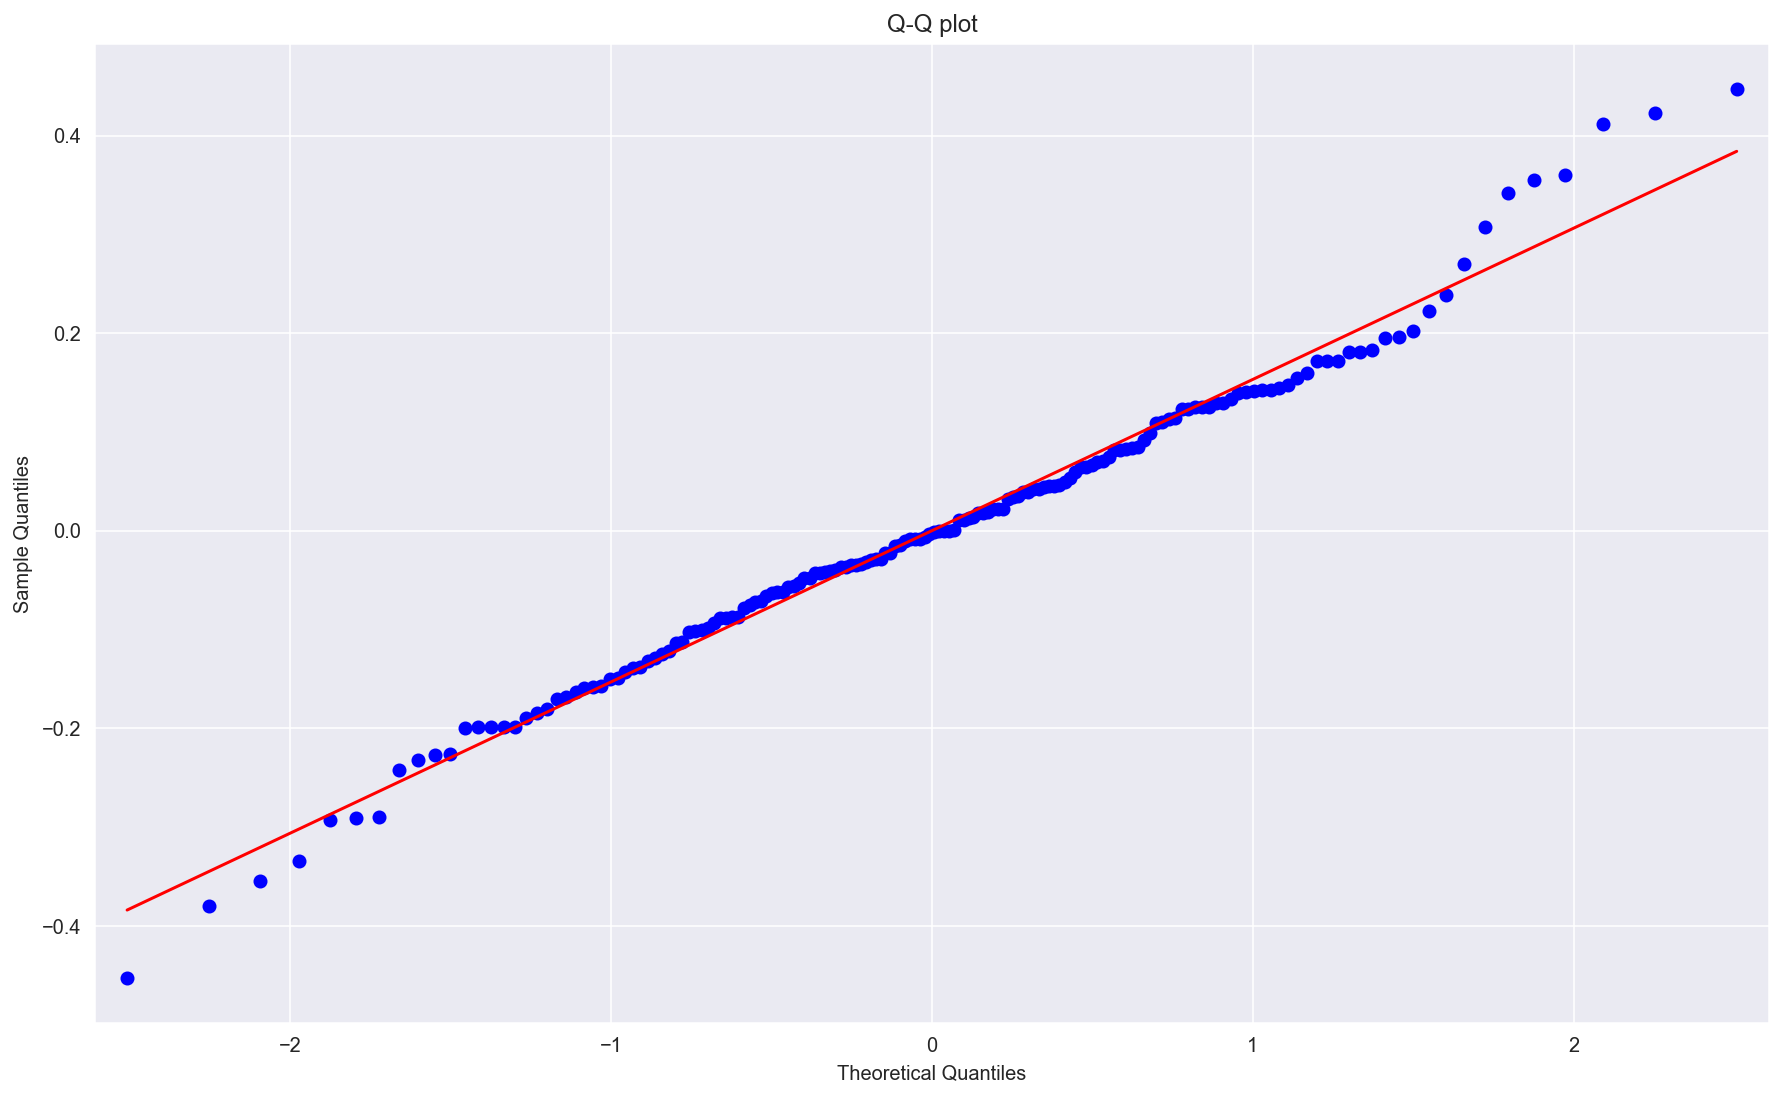

In [131]:
# Normality of Residuals

from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(model_3)

In [ ]:
# The regression model is linear in parameters

In [134]:
# The X variables and residuals are uncorrelated

from scipy.stats.stats import pearsonr

for column in X_train3.columns:
    corr_test = pearsonr(X_train3[column], model_3.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: const --- correlation: nan, p-value: nan
Variable: alfa-romero --- correlation: 0.0000, p-value: 1.0000
Variable: audi --- correlation: 0.0000, p-value: 1.0000
Variable: bmw --- correlation: 0.0000, p-value: 1.0000
Variable: chevrolet --- correlation: -0.0000, p-value: 1.0000
Variable: dodge --- correlation: -0.0000, p-value: 1.0000
Variable: honda --- correlation: -0.0000, p-value: 1.0000
Variable: isuzu --- correlation: -0.0000, p-value: 1.0000
Variable: jaguar --- correlation: 0.0000, p-value: 1.0000
Variable: mazda --- correlation: 0.0000, p-value: 1.0000
Variable: mercedes-benz --- correlation: 0.0000, p-value: 1.0000
Variable: mercury --- correlation: 0.0000, p-value: 1.0000
Variable: mitsubishi --- correlation: -0.0000, p-value: 1.0000
Variable: nissan --- correlation: -0.0000, p-value: 1.0000
Variable: peugot --- correlation: -0.0000, p-value: 1.0000
Variable: plymouth --- correlation: -0.0000, p-value: 1.0000
Variable: porsche --- correlation: 0.0000, p-value: 1.0000

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
# none of the features are correlated with the residuals

In [105]:
X1 = X.apply(pd.to_numeric, errors='coerce')
X1.astype('float64')

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
22,chevrolet,inf
33,plymouth,inf
25,isuzu,inf
26,jaguar,inf
27,mazda,inf
28,mercedes-benz,inf
29,mercury,inf
30,mitsubishi,inf
31,nissan,inf
32,peugot,inf


missing values in the data

#missing data
total = X1.isnull().sum().sort_values(ascending=False)
percent = (X1.isnull().sum()/X1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)